In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.optimize
from scipy.optimize import curve_fit


In [9]:
plt.style.use("./astr19_matplotlib_defaults.txt")

In [10]:
a = np.loadtxt('ASTR19_S22_group_project_data.txt', dtype='str')
i=0

datetemp=[]
timetemp=[]
time=[]
height=[]
date=[]

for arr in a: #fix this part
	datetemp.append(int(arr[0]))
	timetemp.append(arr[1])
	height.append(float(arr[2]))

for elem in timetemp:
	splitelem=elem.split(':')
	abstime = (int(splitelem[0])*60+int(splitelem[1]))
	time.append(abstime)


for elem in time:
	date.append(float(datetemp[i]+elem/1440))
	i+=1

#LOADS ALL DATA ^^^^ AND CREATES LISTS date[] x axis AND height[] (y axis)

heighterr=0.25 #sets uncertainty error

In [11]:
def fittedcurve(x,a,b,c,d,e,f,g,h,i):
    return a*np.sin((b)*np.sin((c)*x+d)+i) + e*np.sin((f)*x+h)+g #Best fit we have found so far

date=np.array(date)
height=np.array(height)

params,cov = curve_fit(fittedcurve,date,height,maxfev=2170000000,p0=[9.00002,-2,10,10,10,10,10,10,10],method='trf',bounds=(-100,400)) 
print(params)
fit = fittedcurve(date,*params)

fitstd=np.std(fit)
print(np.linalg.cond(cov))
np.diag(cov)

[ 3.37726809  1.3474499  -6.28797497 -8.98907435  0.21249588 10.28776125
  3.19715777  7.69827548 12.01871025]
852400.1813924131


array([4.97007740e-01, 1.13826631e-01, 1.16384783e-05, 9.08042751e-03,
       2.09923662e-02, 3.33517385e-03, 6.19187965e-01, 1.88547942e+00,
       2.30045143e-02])

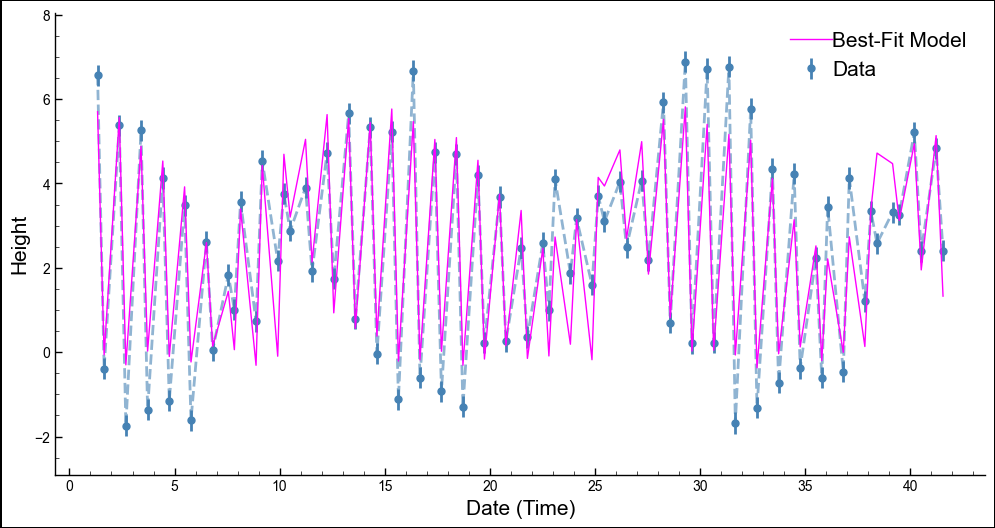

In [21]:
fig = plt.figure(figsize=(12,6),linewidth=1)

fit = fittedcurve(date,*params) #*params unpacks the params[] list generated by curve_fit()


plt.errorbar(date,height,yerr=heighterr,color='steelblue',alpha=1,fmt='o',label='Data')
plt.plot(date,fit,color='magenta',zorder=3,linewidth=1, label='Best-Fit Model')
plt.plot(date,height,color='steelblue',linestyle='dashed',alpha=0.6)
plt.xlabel('Date (Time)', fontsize =15)
plt.ylabel('Height', fontsize =15)
plt.legend(frameon=False,fontsize=15, handletextpad=0)

plt.savefig("ASTR19_Group Project", bbox_inches="tight",facecolor="white")

In [13]:
print(date[0:10])


[1.33819444 1.65069444 2.37152778 2.68402778 3.40625    3.71805556
 4.44097222 4.75       5.47777778 5.78194444]


Residual Data 

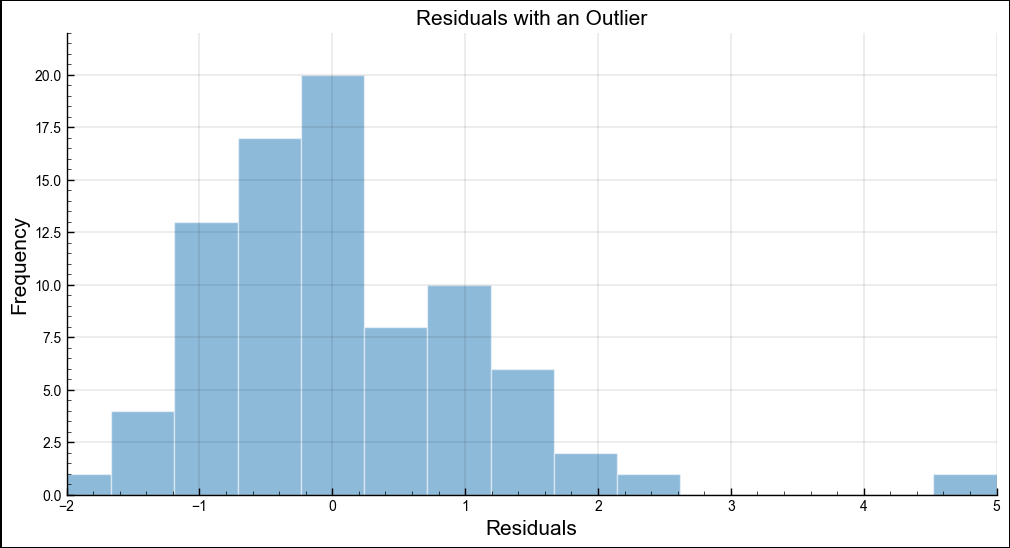

Standard Deviation of Residuals: 1.0206207829015697
Intrinsic Scatter: 0.9895285657779733


In [20]:
residuals = height - fit
outlier = 5      #outlier value of 5
data_with_outlier = np.append(residuals, outlier)   #adds the outlier to the data 

f, ax=plt.subplots(1,1,figsize=(12,6),linewidth=1)        
ax.set_xlim(-2,5)
plt.hist(data_with_outlier,bins=15,alpha=0.5,edgecolor="white")
plt.title("Residuals with an Outlier",fontsize =15)
plt.xlabel('Residuals',fontsize =15)
plt.ylabel('Frequency',fontsize =15)
plt.grid(True)
plt.show()

residual_std = np.std(data_with_outlier)
print(f"Standard Deviation of Residuals: {residual_std}")

intrinsic_scatter = np.sqrt(residual_std**2 - heighterr**2)
print(f"Intrinsic Scatter: {intrinsic_scatter}")